Atlanta has the most damages. Having multiple entries in the top 10

In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import wrangle as w
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
scaler= MinMaxScaler()

In [10]:
df1= w.acquire()
df1= w.prep(df1)

In [219]:
df= w.get_cws_data()

In [220]:
train, validate, test, X_train, y_train, X_val, y_val, X_test, y_test = w.train_vailidate_test_split(df, 'bad_resident', 'bad_resident')

In [21]:
def get_common(df1):
    
    '''
    This functions filters out the negative charge codes, then gets the top six of those codes.
    It then returns a plot to show the results. 
    '''
    
    # negative charge codes
    cc = [96, 105, 106, 115, 127, 131, 137, 138,142, 148, 154,
                155, 156, 163, 166, 169, 183, 189, 192, 229, 231, 233,
                245, 246, 247, 248, 249,250, 251, 253, 268, 298]
    
    
    # top six negative charge codes
    six= [298, 105, 155, 154, 156, 131]
    
    # create new df using negative charge codes
    bad_df= df1[df1['charge_code'].isin(cc)]
    
    # create new df using the top six negative charge codes
    six_df= bad_df[bad_df['charge_code'].isin(six)]
    
    #plotting the results of the function
    color= ['grey', 'grey', 'grey', 'grey', 'grey','red']
    ax = sns.countplot(
                     data= six_df , x= 'charge_code', palette= color,
                     ec= 'black')
    for i in ax.containers:
            ax.bar_label(i,)
    

Takeaways:

Here we can see that Charge Code `298` is the most common, by a huge margine. 

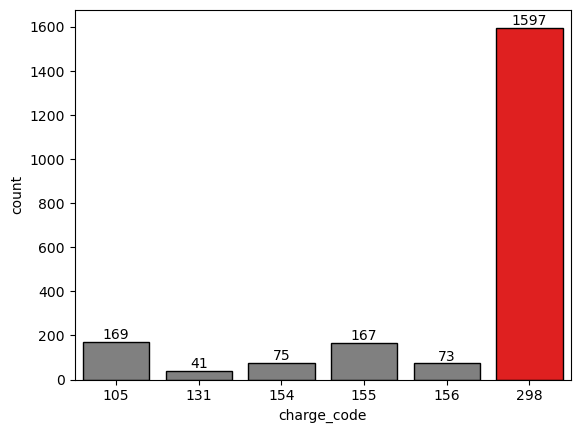

In [22]:
get_common(df1)

In [3]:
cc = [96, 105, 106, 115, 127, 131, 137, 138,142, 148, 154,
                155, 156, 163, 166, 169, 183, 189, 192, 229, 231, 233,
                245, 246, 247, 248, 249,250, 251, 253, 268, 298]

In [180]:
def bad_properties(train):
    
    cc = [96, 105, 106, 115, 127, 131, 137, 138,142, 148, 154,
                155, 156, 163, 166, 169, 183, 189, 192, 229, 231, 233,
                245, 246, 247, 248, 249,250, 251, 253, 268, 298]
    
    six= [298, 105, 155, 154, 156, 131]
    
    bad_properties= train[train['charge_code'].isin(cc)]
    df3= bad_properties.groupby('prop_id')['charge_code'].count().nlargest(10)
    df3= pd.DataFrame({'most_common': df3})
    df3= df3.reset_index()
    return df3

In [ ]:
def plot_bad_props(df3):
    

Text(0, 0.5, 'Charge Code Count')

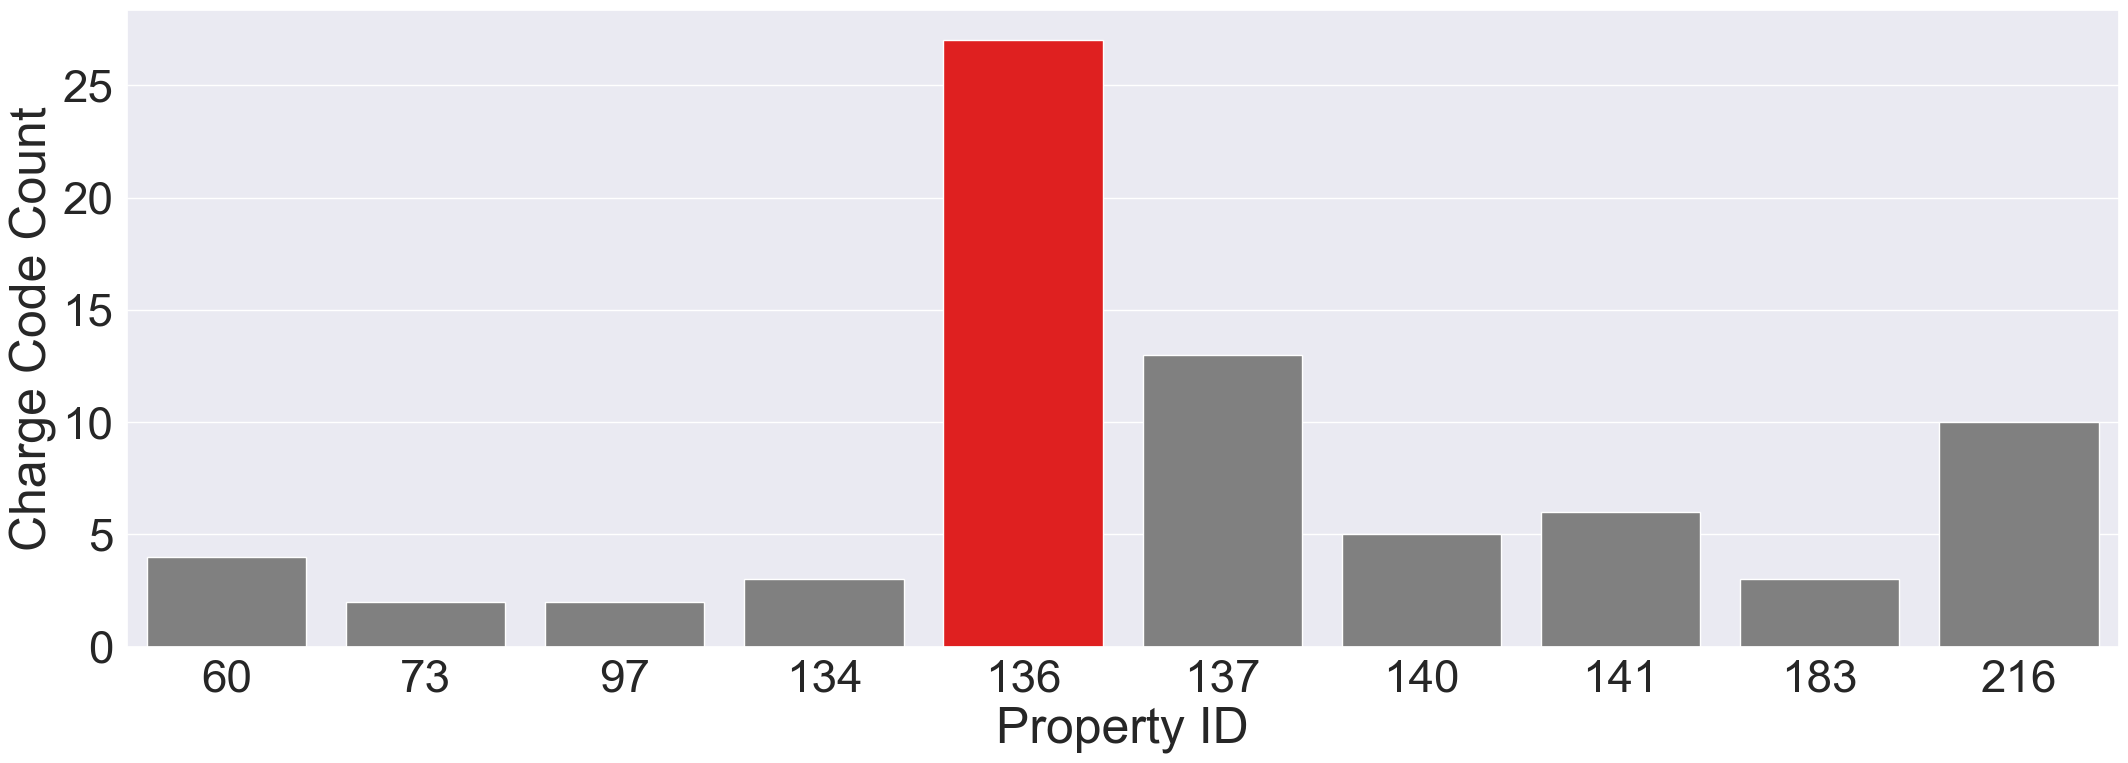

In [234]:
color= ['grey, ''grey', 'grey', 'grey', 'grey','red', 'grey', 'grey']
fig = plt.figure()
sns.barplot(data= df3, x= 'prop_id', y= 'most_common', palette= color)
sns.set(font_scale= 3)
sns.set(rc={'figure.figsize':(25.7,8.27)})
sns.set(font_scale= 3)
plt.xlabel('Property ID')
plt.ylabel('Charge Code Count')

In [212]:
df3

,prop_id,most_common
0,136,27
1,137,13
2,216,10
3,141,6
4,140,5
5,60,4
6,134,3
7,183,3
8,73,2
9,97,2


In [15]:
bad_df= df1[df1['charge_code'].isin(cc)]

In [17]:
six= [298, 105, 155, 154, 156, 131]

In [18]:
six_df= bad_df[bad_df['charge_code'].isin(six)]

In [124]:
bad_df2= train[train['charge_code'].isin(cc)]

In [167]:
bad_df.groupby('property_id')['charge_code'].count().nlargest(10)

property_id
136    736
137    629
216    215
140    105
67      51
73      50
135     48
70      36
142     25
57      24
Name: charge_code, dtype: int64

In [132]:
bad_prop= [136, 137, 141, 138, 216, 139, 142, 67, 135, 60]
bad_prop_df= bad_df2[bad_df2['prop_id'].isin(bad_prop)]

In [163]:
bad_prop= [136, 137, 141, 138, 216, 139, 142, 67, 135, 60]
prop_group= bad_df2[bad_df2['prop_id'].isin(bad_prop)]

In [165]:
prop_group.bad_resident.mean()

1.0